# Visualização de Dados com Cores


In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 18.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 
     |████████████████████████████████| 16.7 MB 48.1 MB/s 


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

## Carregando as bases de dados

Hoje usaremos dados de paises de duas fontes distintas:
* **world**: Dados geográficos
* **covid_dt**: Dados da situação pandêmica em meados de 2022

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
covid_dt = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
covid_dt.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2022-05-05,178905.0,4.0,7.857,7684.0,1.0,0.143,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2022-05-05,11706055.0,10340.0,6400.143,253047.0,66.0,25.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2022-05-05,275266.0,55.0,37.714,3496.0,0.0,0.000,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2022-05-05,265786.0,4.0,1.429,6875.0,0.0,0.000,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
4,AND,Europe,Andorra,2022-05-05,41717.0,368.0,100.571,153.0,0.0,0.000,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


In [6]:
covid_dt.keys()

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [7]:
total_deaths_per_million = [ covid_dt.loc[ covid_dt['iso_code'] == iso, 'total_deaths_per_million' ].values for iso in world['iso_a3']]
world['total_deaths_per_million'] = [ np.nan if x.size < 1 else x[0] for x in total_deaths_per_million]

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total_deaths_per_million
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",954.703
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",13.057
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1042.400
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2994.596


## Visualizando dados quantitativos através de cores

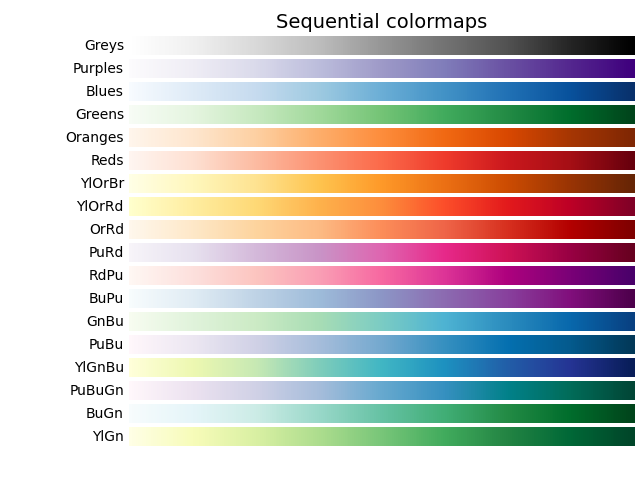

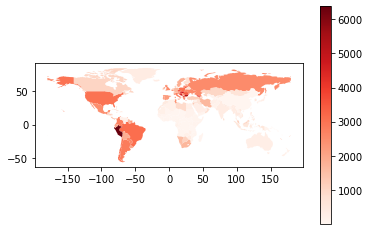

In [13]:
world.plot(column='total_deaths_per_million', cmap='Reds', legend=True)

## Visualizando dados categóricos através de cores

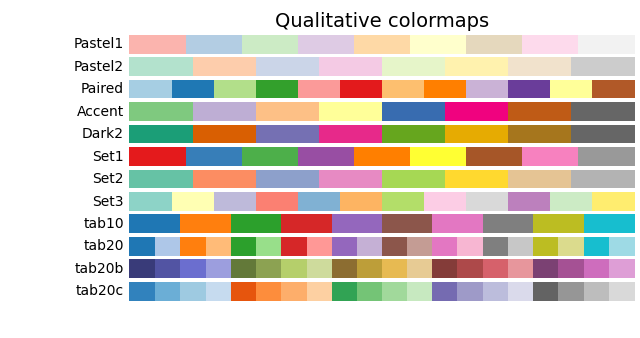

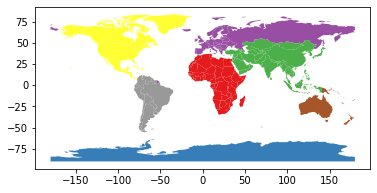

In [10]:
world.plot(column='continent', cmap='Set1')

## Visualizando dados divergentes através de cores

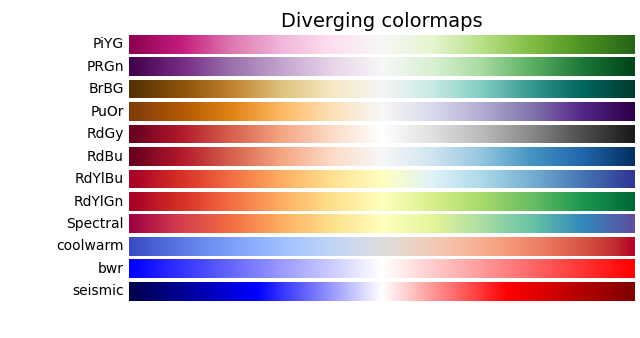

In [11]:
d_BRA = world.loc[ world['iso_a3'] == 'BRA', 'total_deaths_per_million' ].values[0]
world['vs_BRA'] = [x - d_BRA for x in world['total_deaths_per_million']]

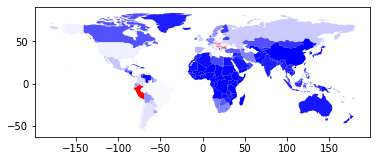

In [12]:
world.plot(column='vs_BRA', cmap='bwr')